# 허프 변환

### 기본 개념
허프 변환(Hough Transform)은 이미지 처리에서 선이나 원 같은 특정 형태를 검출하는 강력한 방법입니다.

허프 변환의 핵심 아이디어는 이미지 공간에서의 점들을 파라미터 공간으로 변환하여 이미지의 특정 형태를 찾는 것입니다.

이를 위해 이미지 공간의 점들이 파라미터 공간에서는 어떻게 표현되는지를 이해해야 합니다.

### 직선 검출
$(x,y)$ 좌표계에서 직선은 다음과 같은 형태로 표현할 수 있습니다.

$y=ax+b$

여기서 $a$는 기울기이고 $b$는 $y$절편 입니다.

A점 $(x,y)=(1,3)$을 직선의 방정식에 대입하면 $3=1a+b$인데 정리하면 다음과 같습니다.

> $b=-a+3$

이 식에서 $a$와 $b$를 변수로 간주하면 이 식은 새로운 공간인 $(a,b)$ 좌표계에서의 한 직선이 됩니다.

새로운 공간에서 $b=-a+3$는 기울기가 $-1$이고 $b$절편이 $3$인 직선입니다.

같은 과정을 B점 $(x,y)=(3,1)$에 적용하면, 이 점은 $(a,b)$ 좌표계에서의 한 직선이 됩니다.

> $b=-3a+1$

$(a,b)$ 공간에서 두 직선이 만나는 점은 $(-1,4)$입니다.

이 점은 원래 $(x,y)$ 공간에서 A점과 B점을 지나는 직선의 기울기와 $y$절편 입니다.

> $y=-x+4$

$(a,b)$ 공간에서 두 직선이 만나는 점은 투표로 알아냅니다.

각각의 직선은 자신이 지나는 점에 1만큼씩 투표를 합니다.

결국 직선이 지나지 않는 점은 0, 직선이 지나는 점은 1표, 두 직선이 만나는 점은 2표를 받게 됩니다.

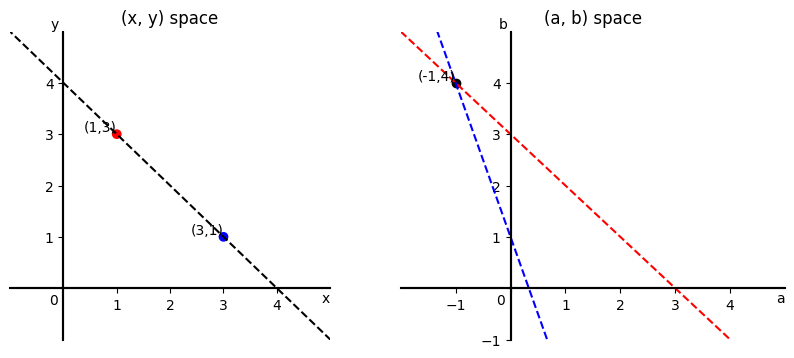

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# 첫 번째 그래프 그리기
fig = plt.figure(figsize=(10, 4))
gs = GridSpec(1, 2, width_ratios=[1, 1.2])  # 두 번째 그래프의 가로 크기를 약간 늘림

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# 첫 번째 서브플롯
x1, y1 = 1, 3
x2, y2 = 3, 1
slope = (y2 - y1) / (x2 - x1)
intercept = y1 - slope * x1
x_values = np.linspace(-2, 6, 100)
y_values = slope * x_values + intercept

ax1.plot(x_values, y_values, 'k--')  # 점선으로 직선 그리기
ax1.scatter([x1, x2], [y1, y2], color=['red', 'blue'])  # 두 점 표시
ax1.text(x1, y1, '(1,3)', verticalalignment='bottom', horizontalalignment='right')
ax1.text(x2, y2, '(3,1)', verticalalignment='bottom', horizontalalignment='right')
ax1.set_title('(x, y) space')

# 축 설정
ax1.axhline(0, color='black', linewidth=1.5)
ax1.axvline(0, color='black', linewidth=1.5)
ax1.set_xlim(-1, 5)
ax1.set_ylim(-1, 5)
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.spines['left'].set_position('zero')
ax1.spines['bottom'].set_position('zero')
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.text(-0.1, -0.1, '0', verticalalignment='top', horizontalalignment='right')
ax1.set_xlabel('x', loc='right', labelpad=-15)
ax1.set_ylabel('y', loc='top', rotation=0, labelpad=-10)
ax1.set_xticks([1, 2, 3, 4])
ax1.set_yticks([1, 2, 3, 4])
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(False)

# 두 번째 서브플롯
a_values = np.linspace(-2, 5, 100)
b1_values = -a_values + 3
b2_values = -3 * a_values + 1

ax2.plot(a_values, b1_values, '--', color='red')  # 빨간색 점선으로 첫 번째 직선 그리기
ax2.plot(a_values, b2_values, '--', color='blue')  # 파란색 점선으로 두 번째 직선 그리기
ax2.scatter([-1], [4], color='black')  # 점 표시
ax2.text(-1, 4, '(-1,4)', verticalalignment='bottom', horizontalalignment='right')
ax2.set_title('(a, b) space')

# 축 설정
ax2.axhline(0, color='black', linewidth=1.5)
ax2.axvline(0, color='black', linewidth=1.5)
ax2.set_xlim(-2, 5)
ax2.set_ylim(0, 5)
ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.spines['left'].set_position('zero')
ax2.spines['bottom'].set_position('zero')
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.set_xlabel('a', loc='right', labelpad=-15)
ax2.set_ylabel('b', loc='top', rotation=0, labelpad=-20)
ax2.set_xticks([-1, 0, 1, 2, 3, 4])
ax2.set_yticks([-1, 0, 1, 2, 3, 4])
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')

# 0 라벨 숨기기
for label in ax2.get_xticklabels():
    if label.get_text() == '0':
        label.set_visible(False)

for label in ax2.get_yticklabels():
    if label.get_text() == '0':
        label.set_visible(False)

ax2.text(-0.1, -0.1, '0', verticalalignment='top', horizontalalignment='right')
ax2.grid(False)

# 그래프를 이미지 파일로 저장
plt.savefig('combined_graph.png')

# 플롯 표시
plt.show()

### 구현
실제 상황에서 구현하려면 몇 가지 사항을 고려해야 합니다.

첫째, 현실에서는 두 점이 아니라 많은 점이 있고 점들이 일직선을 이루지 못합니다.

* 이 문제는 $(a,b)$ 공간을 이산화하여 해결합니다.

* 예를 들어 $a$와 $b$의 범위를 $-1000$~$1000$으로 설정하고 각각을 크기가 $20$인 구간 $50$개로 나누어 칸이 $50$ x $50$ = $2500$인 2차원 누적 배열 $v$를 만듭니다.

* 그리고 이 $2500$개로 이루어진 $v$를 $0$으로 초기화한 다음 각각의 직선은 자신이 지나는 모든 칸에 1만큼씩 투표합니다.

둘째, 투표가 이루어진 누적 배열에 잡음이 많습니다.

* 이는 케니 에지에서 사용했던 비최대 억제(NMS)를 사용하여 지역 최대가 아닌 점을 억제하고 지역 최대만 남겨서 해결합니다.

* 남겨진 지역 최대점(local Maximum)은 극점(extreme point)이라 부르기도 합니다.

* 극점만 남기더라도 잡음이 있어 보통 임계값도 함께 지정하여(케니 에지 과정처럼) 최종 극점을 선택합니다.

셋째, 직선 방정식 $y=ax+b$를 사용하면 기울기 $a$가 무한대인 경우 투표가 불가능합니다.

* 이 문제는 극좌표(polar coordinate)에서 직선의 방정식을 표현하는 아래의 식을 도입하여 해결합니다.

> $xsin(\theta)+ycos(\theta)=\rho$

허프 변환은 직선의 방정식은 알려주지만 직선의 양 끝점은 알려주지 못합니다.

양 끝점을 알아내려면 비최대 억제 과정에서 극점을 형성한 화소를 찾아 가장 먼 곳에 있는 두 화소를 계산하는 추가적인 과정이 필요합니다.

허프 변환은 직선뿐 아니라 어떠한 도형이라도 검출할 수 있습니다. 예를 들어 원을 검출하려면 원의 방정식을 이용합니다.

> $(x-a)^{2} + (y-b)^{2} = r^{2}$

이 식은 $a$, $b$, $r$을 포함하므로 $(a,b,r)$의 3차원 누적 배열을 사용합니다.

---
### RANSAC
허프 변환은 모든 점에 같은 투표 기회를 준다. 이는 이상치에도 투표 기회가 있음을 의미한다.

따라서 허프 변환으로 직선을 검출하면 이상치인 점들에게도 직선을 검출한다.

최소평균제곱오차(LMSE) 알고리즘 역시 이상치를 포함하는 모든 점을 대상으로 오류를 계산하고 최소 오류를 범하는 직선을 찾는다.

허프 변환과 LMSE 알고리즘은 인라이어와 아웃라이어 구별없이 모든 점들이 동등한 자격으로 오류 계산에 참여하기 때문에 아웃라이어에 크게 영향을 받는다.

허프 변환과 LMSE 알고리즘은 둘 다 아웃라이어에 민감한 강인하지 않은 기법이다.

> 1981년에 발표된 RANSAC(RANdom SAmple Consensus)은 인라이어와 아웃라이어가 섞여 있는 상황에서 인라이어를 찾아 최적 근사하는 기법이다.

선분 추정에서 RANSAC은 랜덤하게 두 점을 선택하고 두 점을 지나는 직선을 계산한 뒤 모든 점들에 대해 직선이 얼마나 잘 맞는지 평가합니다.

직선과의 거리가 설정된 임계값 내에 있는 점들을 인라이어로 판단합니다.

RANSAC은 위 과정을 반복하여 인라이어가 최대가 되는 직선을 최종 직선으로 판단합니다.